In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Google_cleaned.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [3]:
df[df.duplicated('App')].shape

(1181, 17)

##Insights
- Dataset has duplicate records.

In [4]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [5]:
df.shape

(9659, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10839
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
 14  Day             9659 non-null   int64  
 15  Month           9659 non-null   int64  
 16  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(

In [7]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

## Exploring data

In [8]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
## print columns
print("we have {} numerical features:{}".format(len(numerical_features),numerical_features))
print("we have {} categorical features:{}".format(len(categorical_features),categorical_features))

we have 10 numerical features:['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
we have 7 categorical features:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [9]:
## Proportion of count data on categorical features
for cols in categorical_features:
  print(df[cols].value_counts(normalize=True)*100)   # instead of displaying in numbers, display in percentage
  print("-----------------------------------------")

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
-----------------------------------------
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINAN

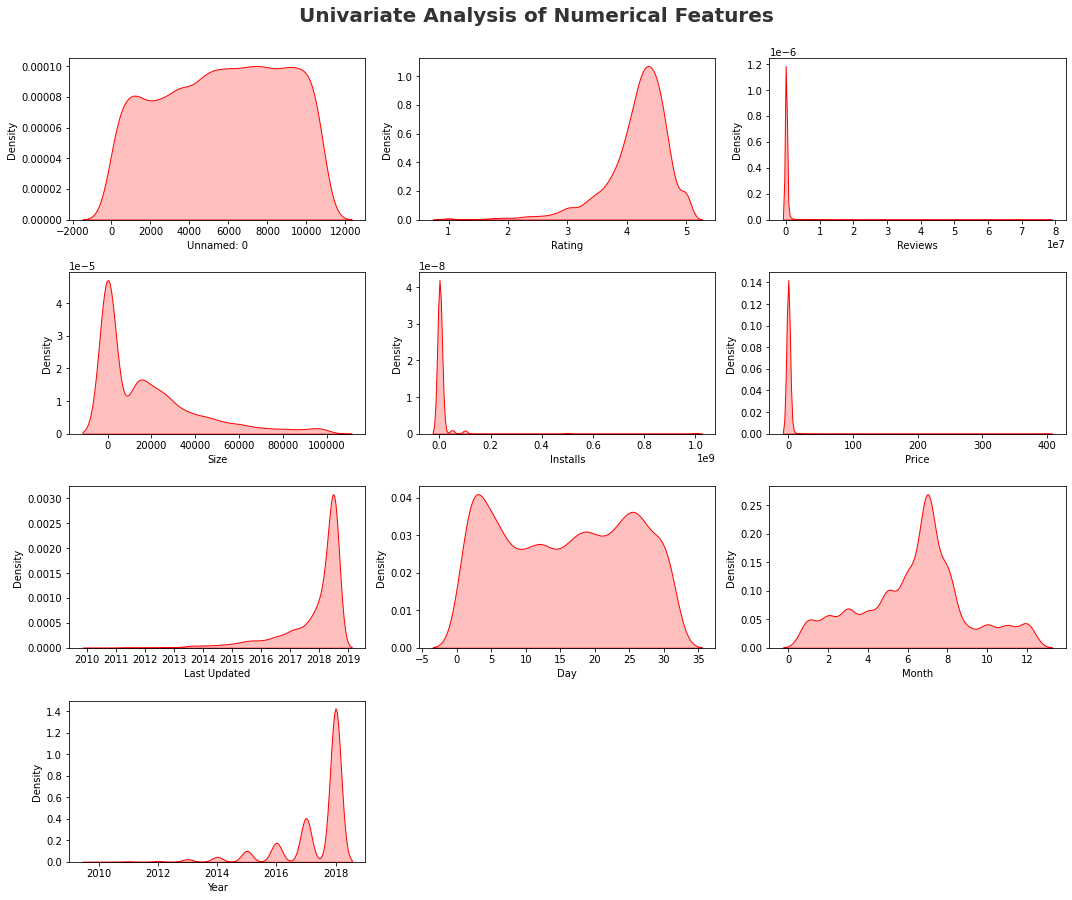

In [10]:
## Proportion of count data on numerical features visualization
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

##Insights
- Rating and Year is left skewed while Reviews,Size,Price and Installs are right skewed

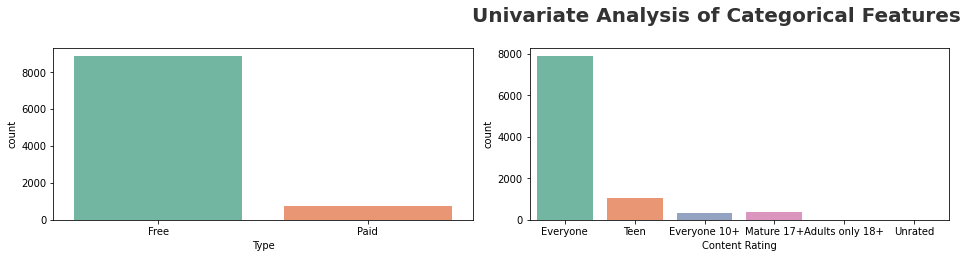

In [11]:
## Proportion of count data on categorical features visualization
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
  plt.subplot(5,3,i+1)
  sns.countplot(x=df[category[i]],palette="Set2")
  plt.xlabel(category[i])
  plt.tight_layout()

<Axes: ylabel='Category'>

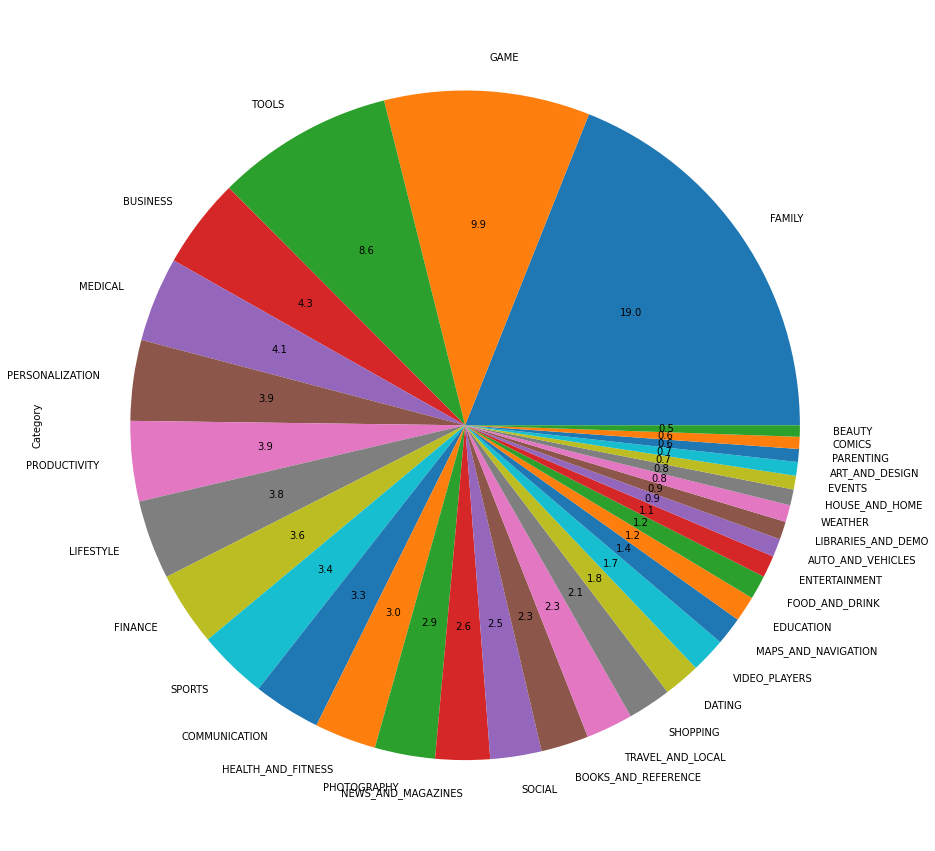

In [12]:
## Which is the most popular app category?
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

##Insights
- There are more kinds of app in playstore which are under category of family,games and tools.
- Beauty,Comics,Art and Weather kinds of app are very less in playstore

In [13]:
## Top 10 App Categories
category=pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [14]:
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


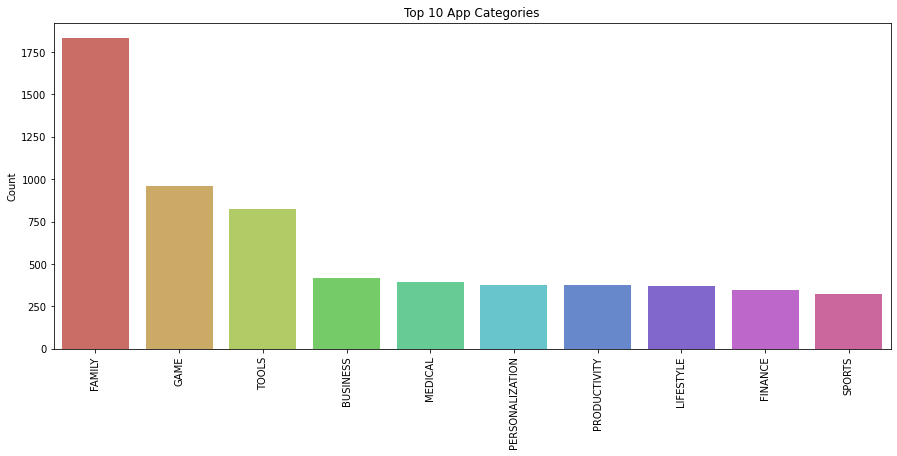

In [15]:
## Top 10 App
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title("Top 10 App Categories")
plt.xticks(rotation=90)
plt.show()

## Insights
- Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
- Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

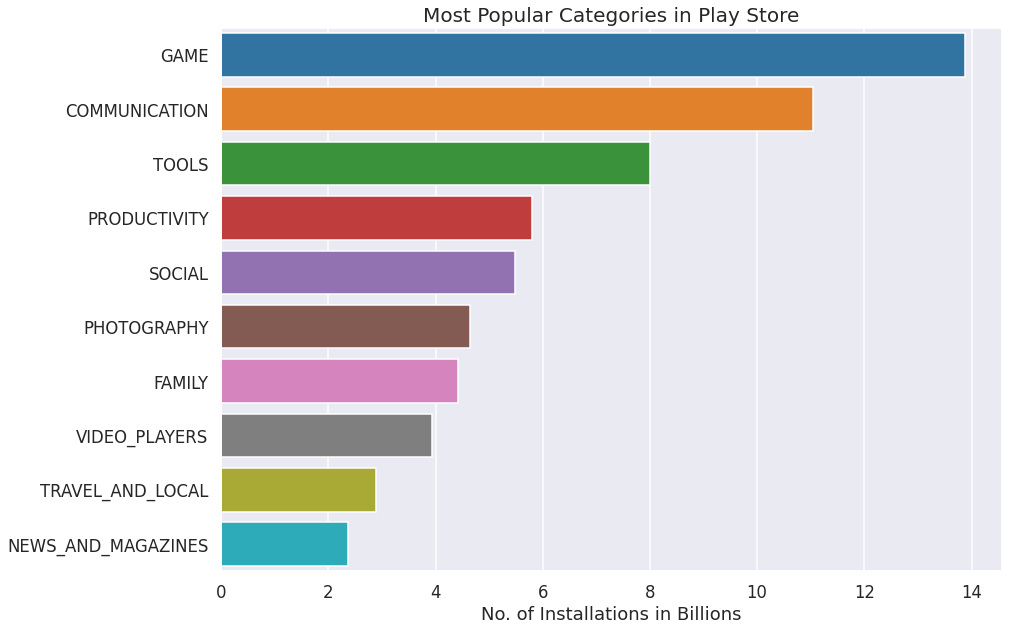

In [16]:
## Which Category has largest number of installations?
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
- Out of all the categories "GAME" has the most number of Installations.
- With almost 35 Billion Installations GAME is the most popular Category in Google App store

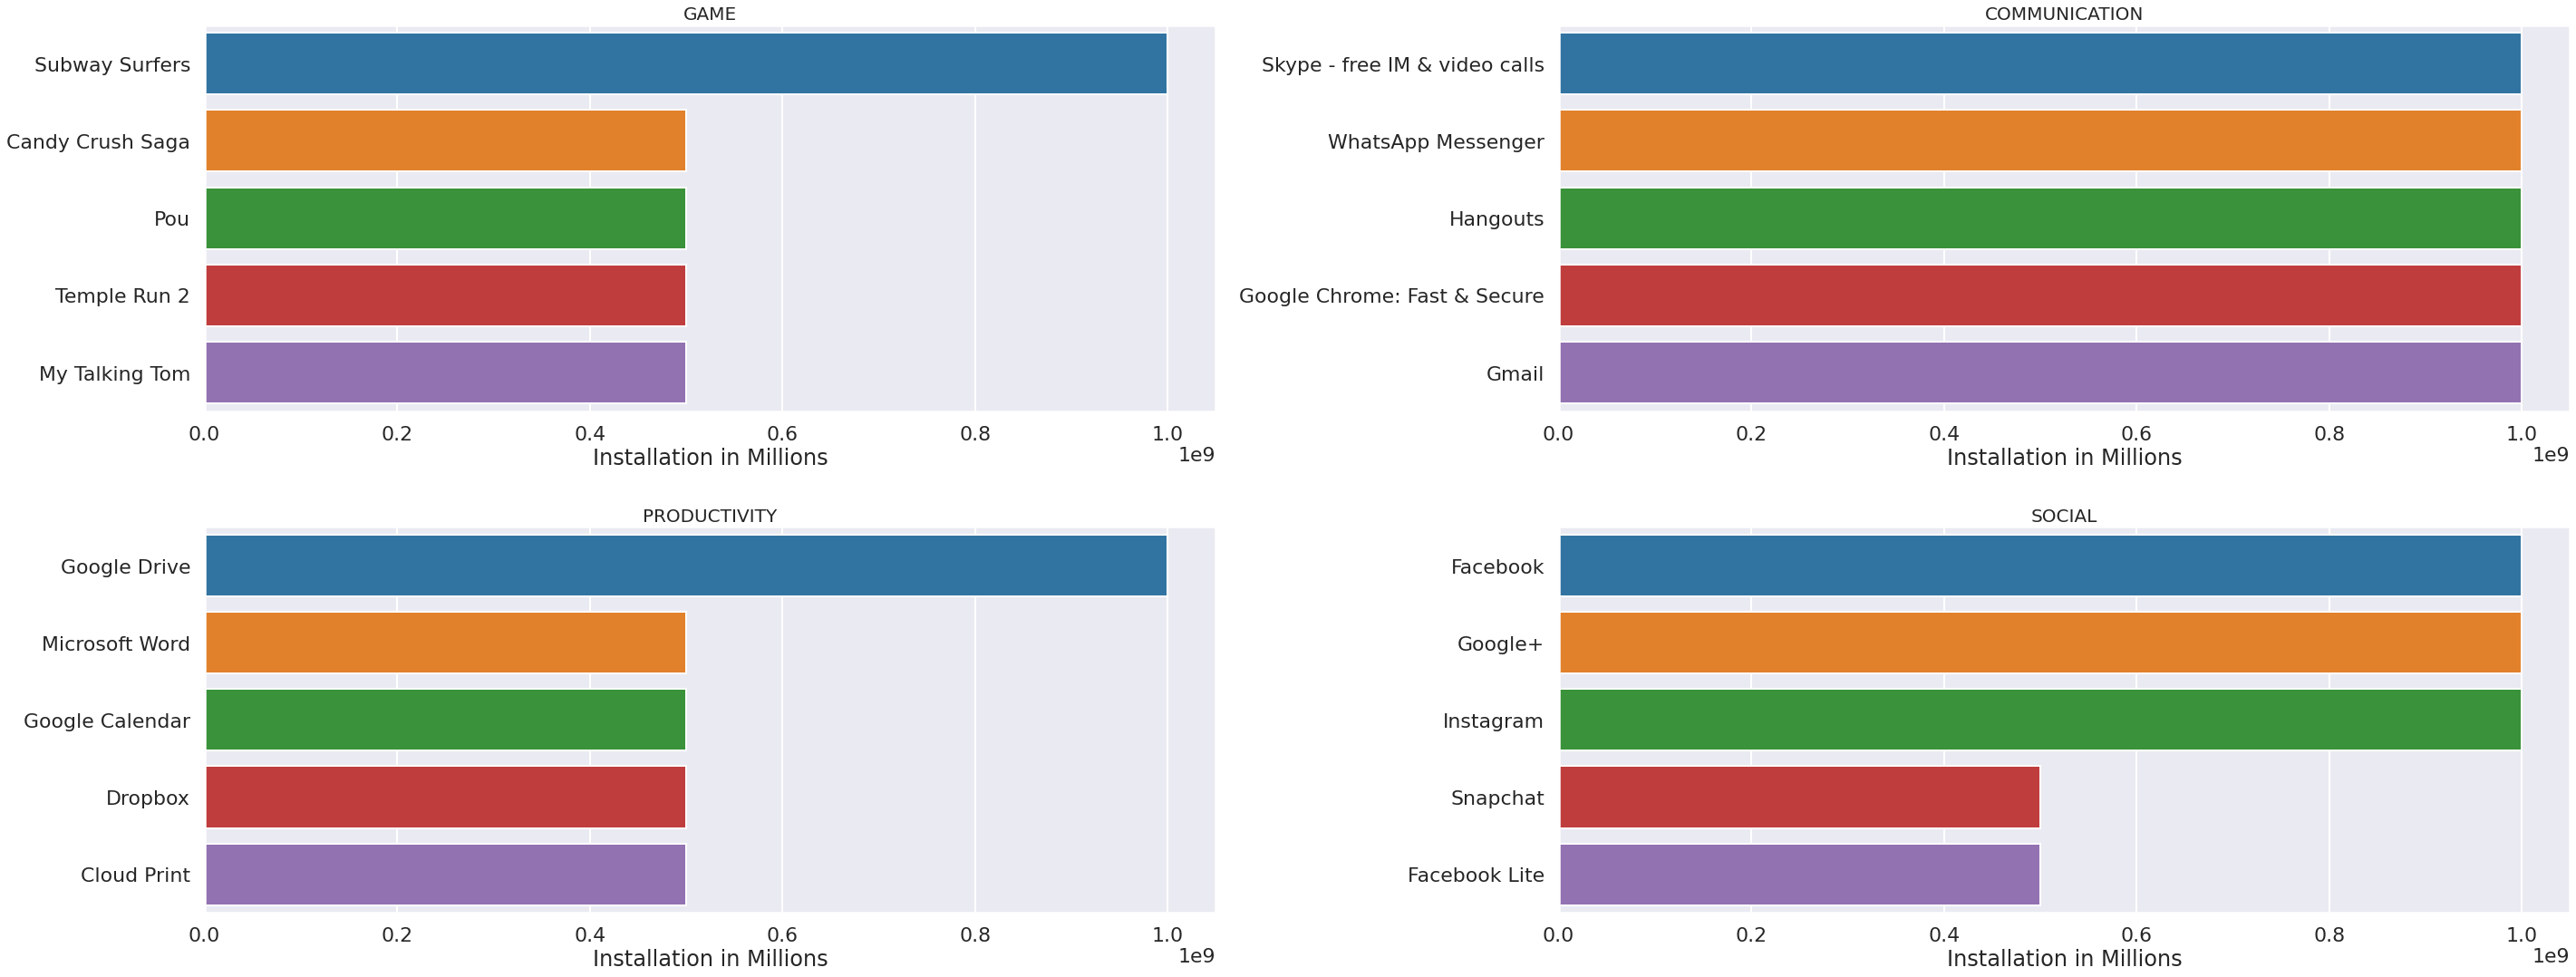

In [17]:
## What are the Top 5 most installed Apps in Each popular Categories?
dfa = df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))
for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)   
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

In [18]:
## How many apps are there on Google Play Store which get 5 ratings?
rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [19]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
